# Creating a credit Rating Model



### Goal

* The goal of this exercise is to build a model that classifies customers as good or bad credit with minimal errors. Since this is a classification problem we shall use a classification algorithm. It is important to note that there is a whole process of cleaning the provided data to ensure it is clean and can be used for building ML models



#### 1. Importing packages 

We begin by importing necessary packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Loading the data

In [2]:
# We then load the data as follows
train_set= pd.read_csv('train_.csv')
test_set= pd.read_csv('test_.csv')

#### 3. Data cleaning and exploration

After loading the data we explore and clean the data in preparation for training. 

We can view: 

a) List of column

b) View the data rows (can view the first few rows or columns)

c) Types of data columns

d) Summary statistics of the data

In [3]:
#Viewing columns in our dataset
print(train_set.columns)
print(test_set.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [4]:
#The following code shows us the first 10 rows of the train dataset
train_set.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [5]:
# #The following code shows us the first 10 rows of the test dataset
test_set.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [6]:
# Checking for data types of the columns in the datasets
train_set.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [7]:
test_set.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [8]:
# We can then get the summary statistics for our data as follows. NOTE that we only get summary statistics for numeric columns only
train_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [9]:
test_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#### We can now begin our data cleaning process.

* The first step would be to check whether our data has any missing values.
* After identifying the existence of missing values we can then decide how to treat them.

In [10]:
#We can chech whether any of the columns in the train_set data has missing values
# After running the code bellow any column that returns a True means that we have atleast one missing value in that column.
print(train_set.isnull().any())


Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool


In [11]:
#We can do the same for the test_set
train_set.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [12]:
# Since we can see that both sets of data have missing values in the colums we can find the number of missing values before deciding on how to treat them.
# For the train set 
train_set.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# For the test set 
test_set.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
# Also before deciding how to treat our missing values we would want to know the size of each set of data
# Also from this we are able to identify our features and label. In our case there are 11 features(As contained in the test set)
# and 1 label; which is the loan status
print(train_set.shape)
print(test_set.shape)

(614, 12)
(367, 11)


#### 5. Handling the missing values 

I will start by by replacing the missing values with mean for numeric features. This is because I will have to scale my numeric features before using them to train my model thus imputing them with mean will not have dire consequences due to the presence of outliners; *NOTE* values in columns such as Applicantincome range from 150 to 81000

In [15]:
# We start by importing the impurter from sklearn.preprocesing
#from sklearn.preprocessing import Imputer
#imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
#We the subset the columns with numeric features that we wish to impute the missing values with the mean
numerical_features=train_set.iloc[:,7:10]
#imp.fit(numerical_features)
#numerical_features=imp.transform(numerical_features)
numerical_features.head()

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0


In [22]:
# We can replace the missing values in the numeric columns with the mean as follows
train_set.LoanAmount.replace(np.nan, np.mean(train_set.loc[:,'LoanAmount']), inplace=True)
train_set.Credit_History.replace(np.nan, np.mean(train_set.loc[:,'Credit_History']),inplace=True)
train_set.Loan_Amount_Term.replace(np.nan, np.mean(train_set.loc[:,'Loan_Amount_Term']), inplace=True)

In [23]:
# When we run the code bellow we see that there are no more missing values in the numeric columns 
train_set.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# We can do the same for the test set
test_set.LoanAmount.replace(np.nan, np.mean(test_set.loc[:,'LoanAmount']), inplace=True)
test_set.Credit_History.replace(np.nan, np.mean(test_set.loc[:,'Credit_History']),inplace=True)
test_set.Loan_Amount_Term.replace(np.nan, np.mean(test_set.loc[:,'Loan_Amount_Term']), inplace=True)
print(test_set.isnull().sum())

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64


In [25]:
# For the categorical columns I will drop the rows with the missing values
train_set= train_set.dropna()
test_set= test_set.dropna()
print(train_set.shape)
print(test_set.shape)

(554, 12)
(324, 11)


In [26]:
# We can check to confirm that our data has no missing values
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
Gender               554 non-null object
Married              554 non-null object
Dependents           554 non-null object
Education            554 non-null object
Self_Employed        554 non-null object
ApplicantIncome      554 non-null int64
CoapplicantIncome    554 non-null float64
LoanAmount           554 non-null float64
Loan_Amount_Term     554 non-null float64
Credit_History       554 non-null float64
Property_Area        554 non-null object
Loan_Status          554 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 56.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 366
Data columns (total 11 columns):
Gender               324 non-null object
Married              324 non-null object
Dependents           324 non-null object
Education            324 non-null object
Self_Employed        324 non-null object
ApplicantIncome      32

#### 6. Other pre-processing techniques

Creating Visualizations

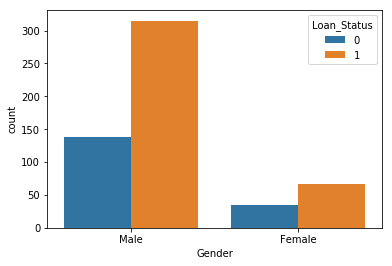

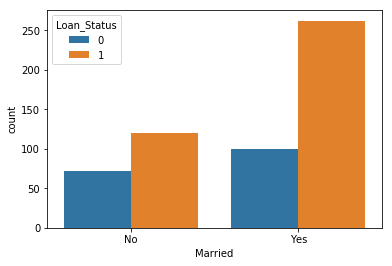

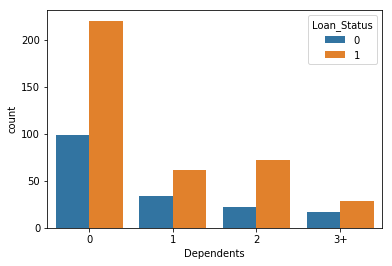

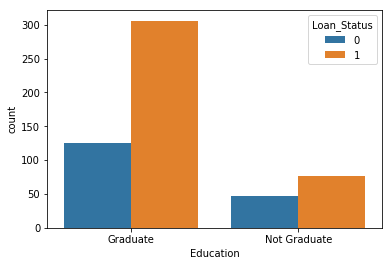

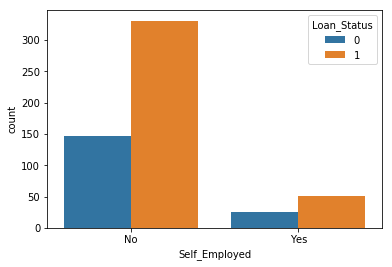

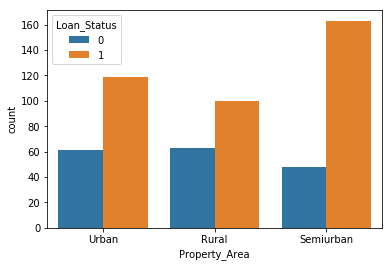

In [27]:
# Since we have dealt with the missing values in our data, we can now create visualisations to determine which features have more
# weight in predicting the label i.e Loan Status
# We can visualize categorical features as follows
cat_cols= ['Gender','Married','Dependents' ,'Education','Self_Employed','Property_Area']
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue= 'Loan_Status', data=train_set)

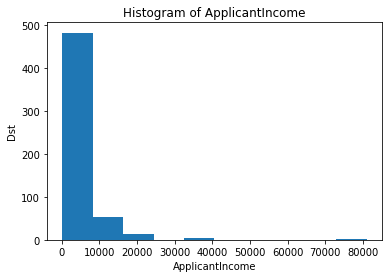

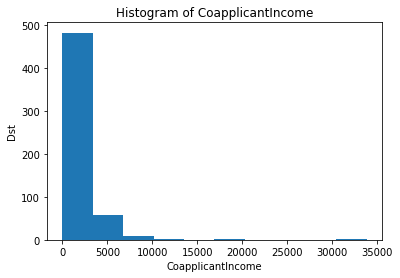

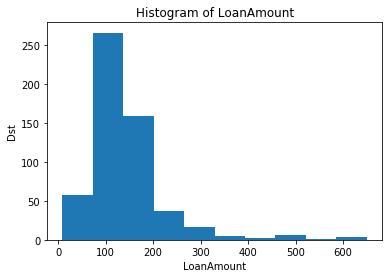

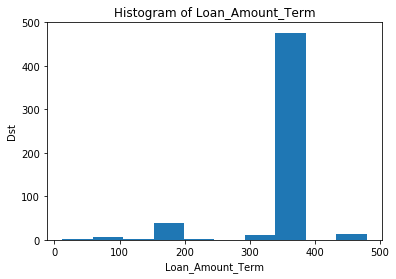

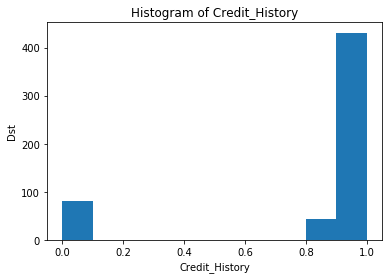

In [28]:
# We can also draw histogram for the numeric features to visualize their distribution 
# This will help in deciding which numeric features to scale before fitting our model
def plot_histogram(train_set, cols):
    for col in cols:
        fig = plt.figure() # define plot area
        ax = fig.gca() # define axis    
        train_set[col].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Dst')# Set text for y axis
        plt.show()
        
num_cols= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History']    
plot_histogram(train_set, num_cols)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


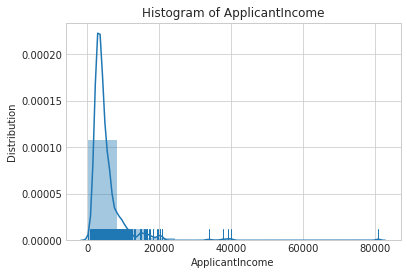

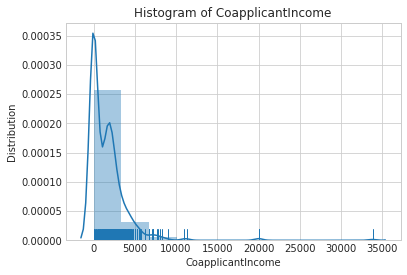

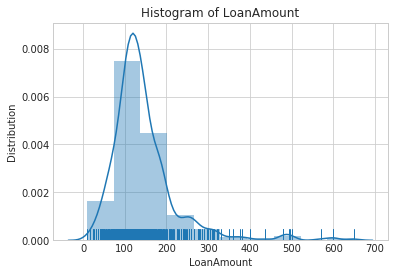

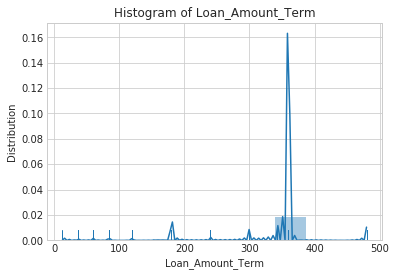

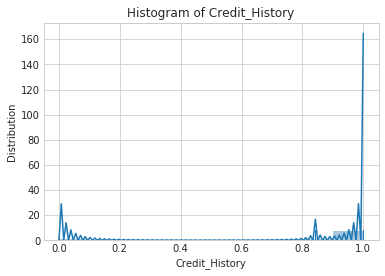

In [29]:
def plot_density_hist(train_set, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(train_set[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col)        # Give the plot a main title
        plt.xlabel(col)                         # Set text for the x axis
        plt.ylabel('Distribution')              # Set text for y axis
        plt.show()
        
plot_density_hist(train_set, num_cols)

From the Above plots it is clear that we will have to scale the numeric features because they are quite skewed 

In [30]:
# We can also check for class imbalance as follows
train_set_counts = train_set[['Credit_History', 'Loan_Status']].groupby('Loan_Status').count()
train_set_counts

,Credit_History
Loan_Status,
0,172
1,382


In [31]:
# Our features set is
train_set_enc=train_set.copy()
train_set_Features= train_set_enc.drop(['Loan_Status'], axis=1)
train_set_Features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [32]:
# Creating our Label by subsetting 
train_set_Label = train_set_enc.loc[:, 'Loan_Status']

In [33]:
# Using the pd.get_dummies method to ecode our categorical features
train_set_encoded= pd.get_dummies(train_set_Features, drop_first=True)
train_set_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1


In [34]:
# We can now scale the numeric features as follows. In this case I have decided to use the MinMax scaler which puts the numeric values in the range 0 to 1
# I also don't scale the Credit_History column because its values are already in the range [0,1]
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn import preprocessing

scaler=preprocessing.MinMaxScaler()
scaler.fit(train_set_encoded.iloc[:,0:4])
train_set_encoded.iloc[:,0:4]=scaler.transform(train_set_encoded.iloc[:,0:4])
train_set_encoded.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.214372,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.054830,0.044567,0.185647,0.74359,1.0,1,1,1,0,0,0,0,0,0
2,0.035250,0.000000,0.088924,0.74359,1.0,1,1,0,0,0,0,1,0,1
3,0.030093,0.069687,0.173167,0.74359,1.0,1,1,0,0,0,1,0,0,1
4,0.072356,0.000000,0.205928,0.74359,1.0,1,0,0,0,0,0,0,0,1
5,0.065145,0.124006,0.402496,0.74359,1.0,1,1,0,1,0,0,1,0,1
6,0.027001,0.044803,0.134165,0.74359,1.0,1,1,0,0,0,1,0,0,1
7,0.035696,0.074002,0.232449,0.74359,0.0,1,1,0,0,1,0,0,1,0
8,0.047693,0.045099,0.248050,0.74359,1.0,1,1,0,1,0,0,0,0,1
9,0.156970,0.324142,0.530421,0.74359,1.0,1,1,1,0,0,0,0,1,0


In [35]:
# We now have our features and label in the format that we can use them for our Machine Learning Model
# I have choosen to start with all the feature and eliminate the less important features later on as 
# part of my model performance optimazation
# We will fit a Logistic regression Model that predicts whether a customers loan request will be approved or not
# We start by importing all the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [36]:
# We split our data train_set data into train and test/validation set
X_train,X_test, y_train, y_test= train_test_split(train_set_encoded,train_set_Label, test_size=0.25, random_state=42)
# We the instanciate and fit our model
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)
# Our predicted Label can be calculated as follows
y_pred= log_reg.predict(X_test)

In [37]:
# Since our model is now fitted we can print the metrics to see its performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Model Accuracy:', accuracy_score(y_test,y_pred))

[[19 22]
 [ 2 96]]
             precision    recall  f1-score   support

          0       0.90      0.46      0.61        41
          1       0.81      0.98      0.89        98

avg / total       0.84      0.83      0.81       139

Model Accuracy: 0.8273381294964028


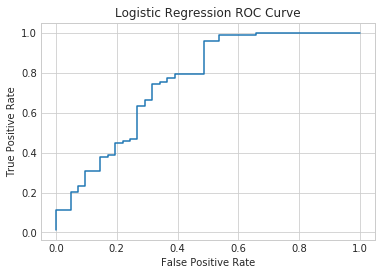

0.757093081134893

In [38]:
# We can also plot the ROC curve for our classifier as follows
y_pred_prob= log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

The model has performed quite well but we now need to go back and apply various techniques such as Regularization, PCA and dropping
some features with low predicting power and other techniques to help optimize the model before Testing it on The actual test set that does not have the Labels.

It is important to note that I opted to start with all the features and then use the greedy backward technique to select my optimal features that gives me the best model


### Important Notes before proceeding to optimize the model:

* Building Machine Learning models is an iterative process which requires regular and continued improvement to ensure accurate, relevant &amp; consistent results.
* Since the number of bad credit customers is half that of good credit customers, there is a substancial class imbalance. Also it is more costly for a bank to classify a bad credit customer as a good credit customer than it is for a bank to classify a good credit customer as a bad credit customer. It is therefore advisable to oversample the bad credit customers( Minority) and make it our class of interest.
